# Ensemble voting

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import pandas as pd

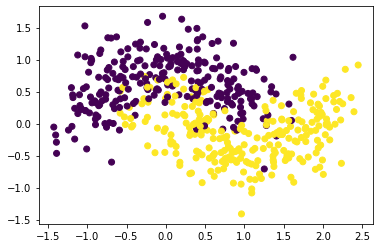

In [40]:
x, y = make_moons(n_samples=500, noise=0.3, random_state=0)
# plt.scatter(x, y)
plt.scatter(x=x[:, 0], y=x[:, 1], c=y)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Importer les modèles

In [45]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Modèle simple

In [46]:
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

for model in (model_1, model_2, model_3):
    model.fit(X_train, y_train)
    
    print('Modèle: {} Score: {}'.format( model.__class__.__name__, model.score(X_test, y_test) ))

Modèle: SGDClassifier Score: 0.84
Modèle: DecisionTreeClassifier Score: 0.86
Modèle: KNeighborsClassifier Score: 0.86


## Voting Classifier

In [47]:
from sklearn.ensemble import VotingClassifier

![image 17](images/17.png)

In [48]:
model_4 = VotingClassifier([('SGD', model_1), ('Tree', model_2), ('KNN', model_3)], voting='hard')

In [49]:
for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    
    print('Modèle: {} Score: {}'.format( model.__class__.__name__, model.score(X_test, y_test) ))

Modèle: SGDClassifier Score: 0.84
Modèle: DecisionTreeClassifier Score: 0.86
Modèle: KNeighborsClassifier Score: 0.86
Modèle: VotingClassifier Score: 0.8733333333333333


In [50]:
model_5 = VotingClassifier([('SGD', model_1), ('Tree', model_2), ('KNN', model_3)], voting='soft')